## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pickle
import pathlib
import os
import copy
import datetime
import time

import seaborn as sns

## Import the preprocessed data with percentages

In [2]:
df=pd.read_csv("C:\\Users\\Alya\\Documents\\CanDev\\Preprocessed_Data_with_Label.csv", sep=',',encoding='utf8')

## Label columns

In [3]:
#define the label columns as answers to the questions regarding mobility: questions 163 and 164

label_columns=['ANSWER1_163', 'ANSWER2_163', 'ANSWER3_163', 'ANSWER1_164', 'ANSWER2_164', 'ANSWER3_164', 'ANSWER4_164', 'ANSWER5_164', 'ANSWER6_164']

## Define new labels

In [4]:
#dataframe of labels only, in percentages
label_df_percent=df[label_columns].copy(deep=True)

#labels only, in decimals
label_df_decimals=label_df_percent.div(10, axis='columns')

#label_df_decimals.head()

In [5]:
#Label_1: whether people want to leave
Label_1=label_df_decimals['ANSWER1_163'].floordiv(1).astype(int)

#Label_2: if people don't know whether they want to leave
Label_2=label_df_decimals['ANSWER3_163'].floordiv(1).astype(int)

#Label_3: if people are leaving for another place, that is not retirement
Label_3_unfloored=label_df_decimals['ANSWER3_164']+ label_df_decimals['ANSWER4_164']


Label_3=pd.DataFrame(Label_3_unfloored).floordiv(1).astype(int)

Label_3.head()

#Label_4: if people want to leave for another reason
Label_4=label_df_decimals['ANSWER6_164'].floordiv(1).astype(int)

In [6]:
df_all_labels=pd.concat([Label_1, Label_2, Label_3, Label_4])

# PCA

## Normaliser les colonnes

In [7]:
#def max_scaling(series):
#    return (series - series.min()) / (series.max() - series.min())

def max_scaling(series):
    return (series) / (series.max())

normalized_percentages_df=df.copy(deep=True)
percentages_columns=normalized_percentages_df.columns

for col in percentages_columns:
    normalized_percentages_df[col] = max_scaling(normalized_percentages_df[col])


#print(normalized_ponderated_df)

## Séparer les données en X et y

In [26]:
#define label with label=['name of column']
X_train = normalized_percentages_df.drop(labels=label_columns, axis=1)
#y_train = normalized_ponderated_df[label_columns]
y_train=Label_3
y_train.rename(columns={'Label_3':"Label_3: Out of 10 - Proportion of people leaving for another place"}, inplace=True)
print(y_train)

#X_train.isin([np.inf, -np.inf]).describe()

      Label_3: Out of 10 - Proportion of people leaving for another place
0                                                     3                  
1                                                     2                  
2                                                     3                  
3                                                     2                  
4                                                     3                  
...                                                 ...                  
4696                                                  4                  
4697                                                  0                  
4698                                                  7                  
4699                                                  5                  
4700                                                  7                  

[4701 rows x 1 columns]


In [27]:
print(y_train)

      Label_3: Out of 10 - Proportion of people leaving for another place
0                                                     3                  
1                                                     2                  
2                                                     3                  
3                                                     2                  
4                                                     3                  
...                                                 ...                  
4696                                                  4                  
4697                                                  0                  
4698                                                  7                  
4699                                                  5                  
4700                                                  7                  

[4701 rows x 1 columns]


In [28]:
np.isinf(y_train).values.sum()

0

## Computing the PCA

In [29]:
from sklearn.decomposition import PCA

#X_train = ponderated_df.drop(labels=label_columns, axis=1)
n_components = 20
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(X_train)


principalDf = pd.DataFrame(data = principalComponents[:,:3],#we only take the first 3 components
             columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principalDf

,principal component 1,principal component 2,principal component 3
0,10.211521,7.932792,2.954449
1,9.633009,7.741875,3.395648
2,9.460964,7.659609,3.551017
3,9.429706,7.576818,3.574399
4,9.813348,7.633369,3.083228
...,...,...,...
4696,-1.981854,-6.212723,1.541936
4697,-2.149888,-6.293907,1.927926
4698,-2.112862,-6.279583,1.765816
4699,-1.922569,-6.214781,1.571410


In [30]:
#make a df with the labels and the values of the PCA


targets = pd.DataFrame(data = y_train)
finalDf = pd.concat([principalDf, targets], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,Label_3: Out of 10 - Proportion of people leaving for another place
0,10.211521,7.932792,2.954449,3
1,9.633009,7.741875,3.395648,2
2,9.460964,7.659609,3.551017,3
3,9.429706,7.576818,3.574399,2
4,9.813348,7.633369,3.083228,3
...,...,...,...,...
4696,-1.981854,-6.212723,1.541936,4
4697,-2.149888,-6.293907,1.927926,0
4698,-2.112862,-6.279583,1.765816,7
4699,-1.922569,-6.214781,1.571410,5


In [31]:
finalDf

,principal component 1,principal component 2,principal component 3,Label_3: Out of 10 - Proportion of people leaving for another place
0,10.211521,7.932792,2.954449,3
1,9.633009,7.741875,3.395648,2
2,9.460964,7.659609,3.551017,3
3,9.429706,7.576818,3.574399,2
4,9.813348,7.633369,3.083228,3
...,...,...,...,...
4696,-1.981854,-6.212723,1.541936,4
4697,-2.149888,-6.293907,1.927926,0
4698,-2.112862,-6.279583,1.765816,7
4699,-1.922569,-6.214781,1.571410,5


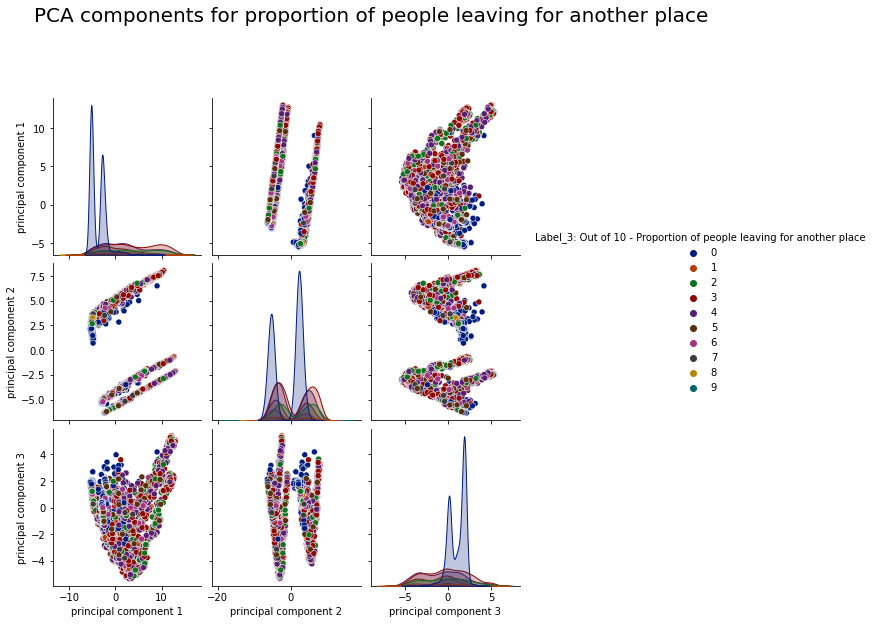

In [32]:
#sns.set(color_codes=True)
#sns.set_palette("Blues")

#fig = plt.figure(figsize = (8,8))
#ax = fig.add_subplot(1,1,1)
#ax.legend("ANSWER1_163")
#ax.grid()

plot = sns.pairplot(finalDf, hue="Label_3: Out of 10 - Proportion of people leaving for another place", palette="dark")#Spectral
#plot.fig.suptitle("Components for Label3", size=20, y=1.08) 
plt.title("PCA components for proportion of people leaving for another place", y=2.5, x=0, size=20)
plt.savefig("Results/Components_for_Label3.png",  bbox_inches="tight")

In [15]:
y_train.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

### Percentage of Explained variance by the 3 first components:

In [ ]:
num_of_components = [i for i in range(n_components)]
explained_var     = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(n_components)]

plt.plot(num_of_components, explained_var, color = "blue")
plt.title("% of explained variance per number of components for Label3")
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Number of Components")
plt.savefig("Results/Percentage_of_explained_variance_for_PCA_over_Label3.png")

In [ ]:
print("Percentage of explained variance of the first three components is equal to : {}".format(np.sum(pca.explained_variance_ratio_[:2])))

### First three components are made of:

In [ ]:
three_comp = pd.DataFrame(data =pca.components_[:3], columns = X_train.columns)
three_comp.describe()

In [ ]:
three_comp.reset_index()
three_comp.head()

In [ ]:
#most discriminant features for every component
index_list = []
colonnes=three_comp.columns
for i in range(3):
    disc = pd.DataFrame(np.argsort(three_comp.abs().values)[i:i+1,-10:])
    index_list.append(colonnes[np.array(disc.values)][0][::-1])

In [ ]:
index_list

In [ ]:
new_index_list=np.vstack((index_list[0],index_list[1], index_list[2]))


In [ ]:
new_index_list

In [ ]:
pd.DataFrame(new_index_list).to_csv("Results/important_features_for_first_3_PCA_components_Label_3.csv")